In [1]:
# Importing Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as spy
import os
import warnings
warnings.filterwarnings('ignore')
# Importing Train Data
data = pd.read_csv('/kaggle/input/traindata/train.csv')
data.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [2]:
# Col Names
data.columns

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'defects'],
      dtype='object')

In [3]:
# Null Values
data.isnull().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [4]:
# Shape of data
data.shape

(101763, 23)

In [5]:
# Info of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [6]:
# Stats of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,101763.0,50881.000000,29376.592059,0.0,25440.50,50881.00,76321.50,101762.00
loc,101763.0,37.347160,54.600401,1.0,13.00,22.00,42.00,3442.00
v(g),101763.0,5.492684,7.900855,1.0,2.00,3.00,6.00,404.00
ev(g),101763.0,2.845022,4.631262,1.0,1.00,1.00,3.00,165.00
iv(g),101763.0,3.498826,5.534541,1.0,1.00,2.00,4.00,402.00
n,101763.0,96.655995,171.147191,0.0,25.00,51.00,111.00,8441.00
v,101763.0,538.280956,1270.791601,0.0,97.67,232.79,560.25,80843.08
l,101763.0,0.111634,0.100096,0.0,0.05,0.09,0.15,1.00
d,101763.0,13.681881,14.121306,0.0,5.60,9.82,18.00,418.20
i,101763.0,27.573007,22.856742,0.0,15.56,23.36,34.34,569.78


#### From the statistics, we can clearly see that we need to apply feature scaling to normalise the data. 
#### Because Min Value is 0 and Max Values are far away from the range
#### Also, we need to convert our target column into an integer format before applying any Machine Learning algorithm.

<Figure size 1200x1200 with 0 Axes>

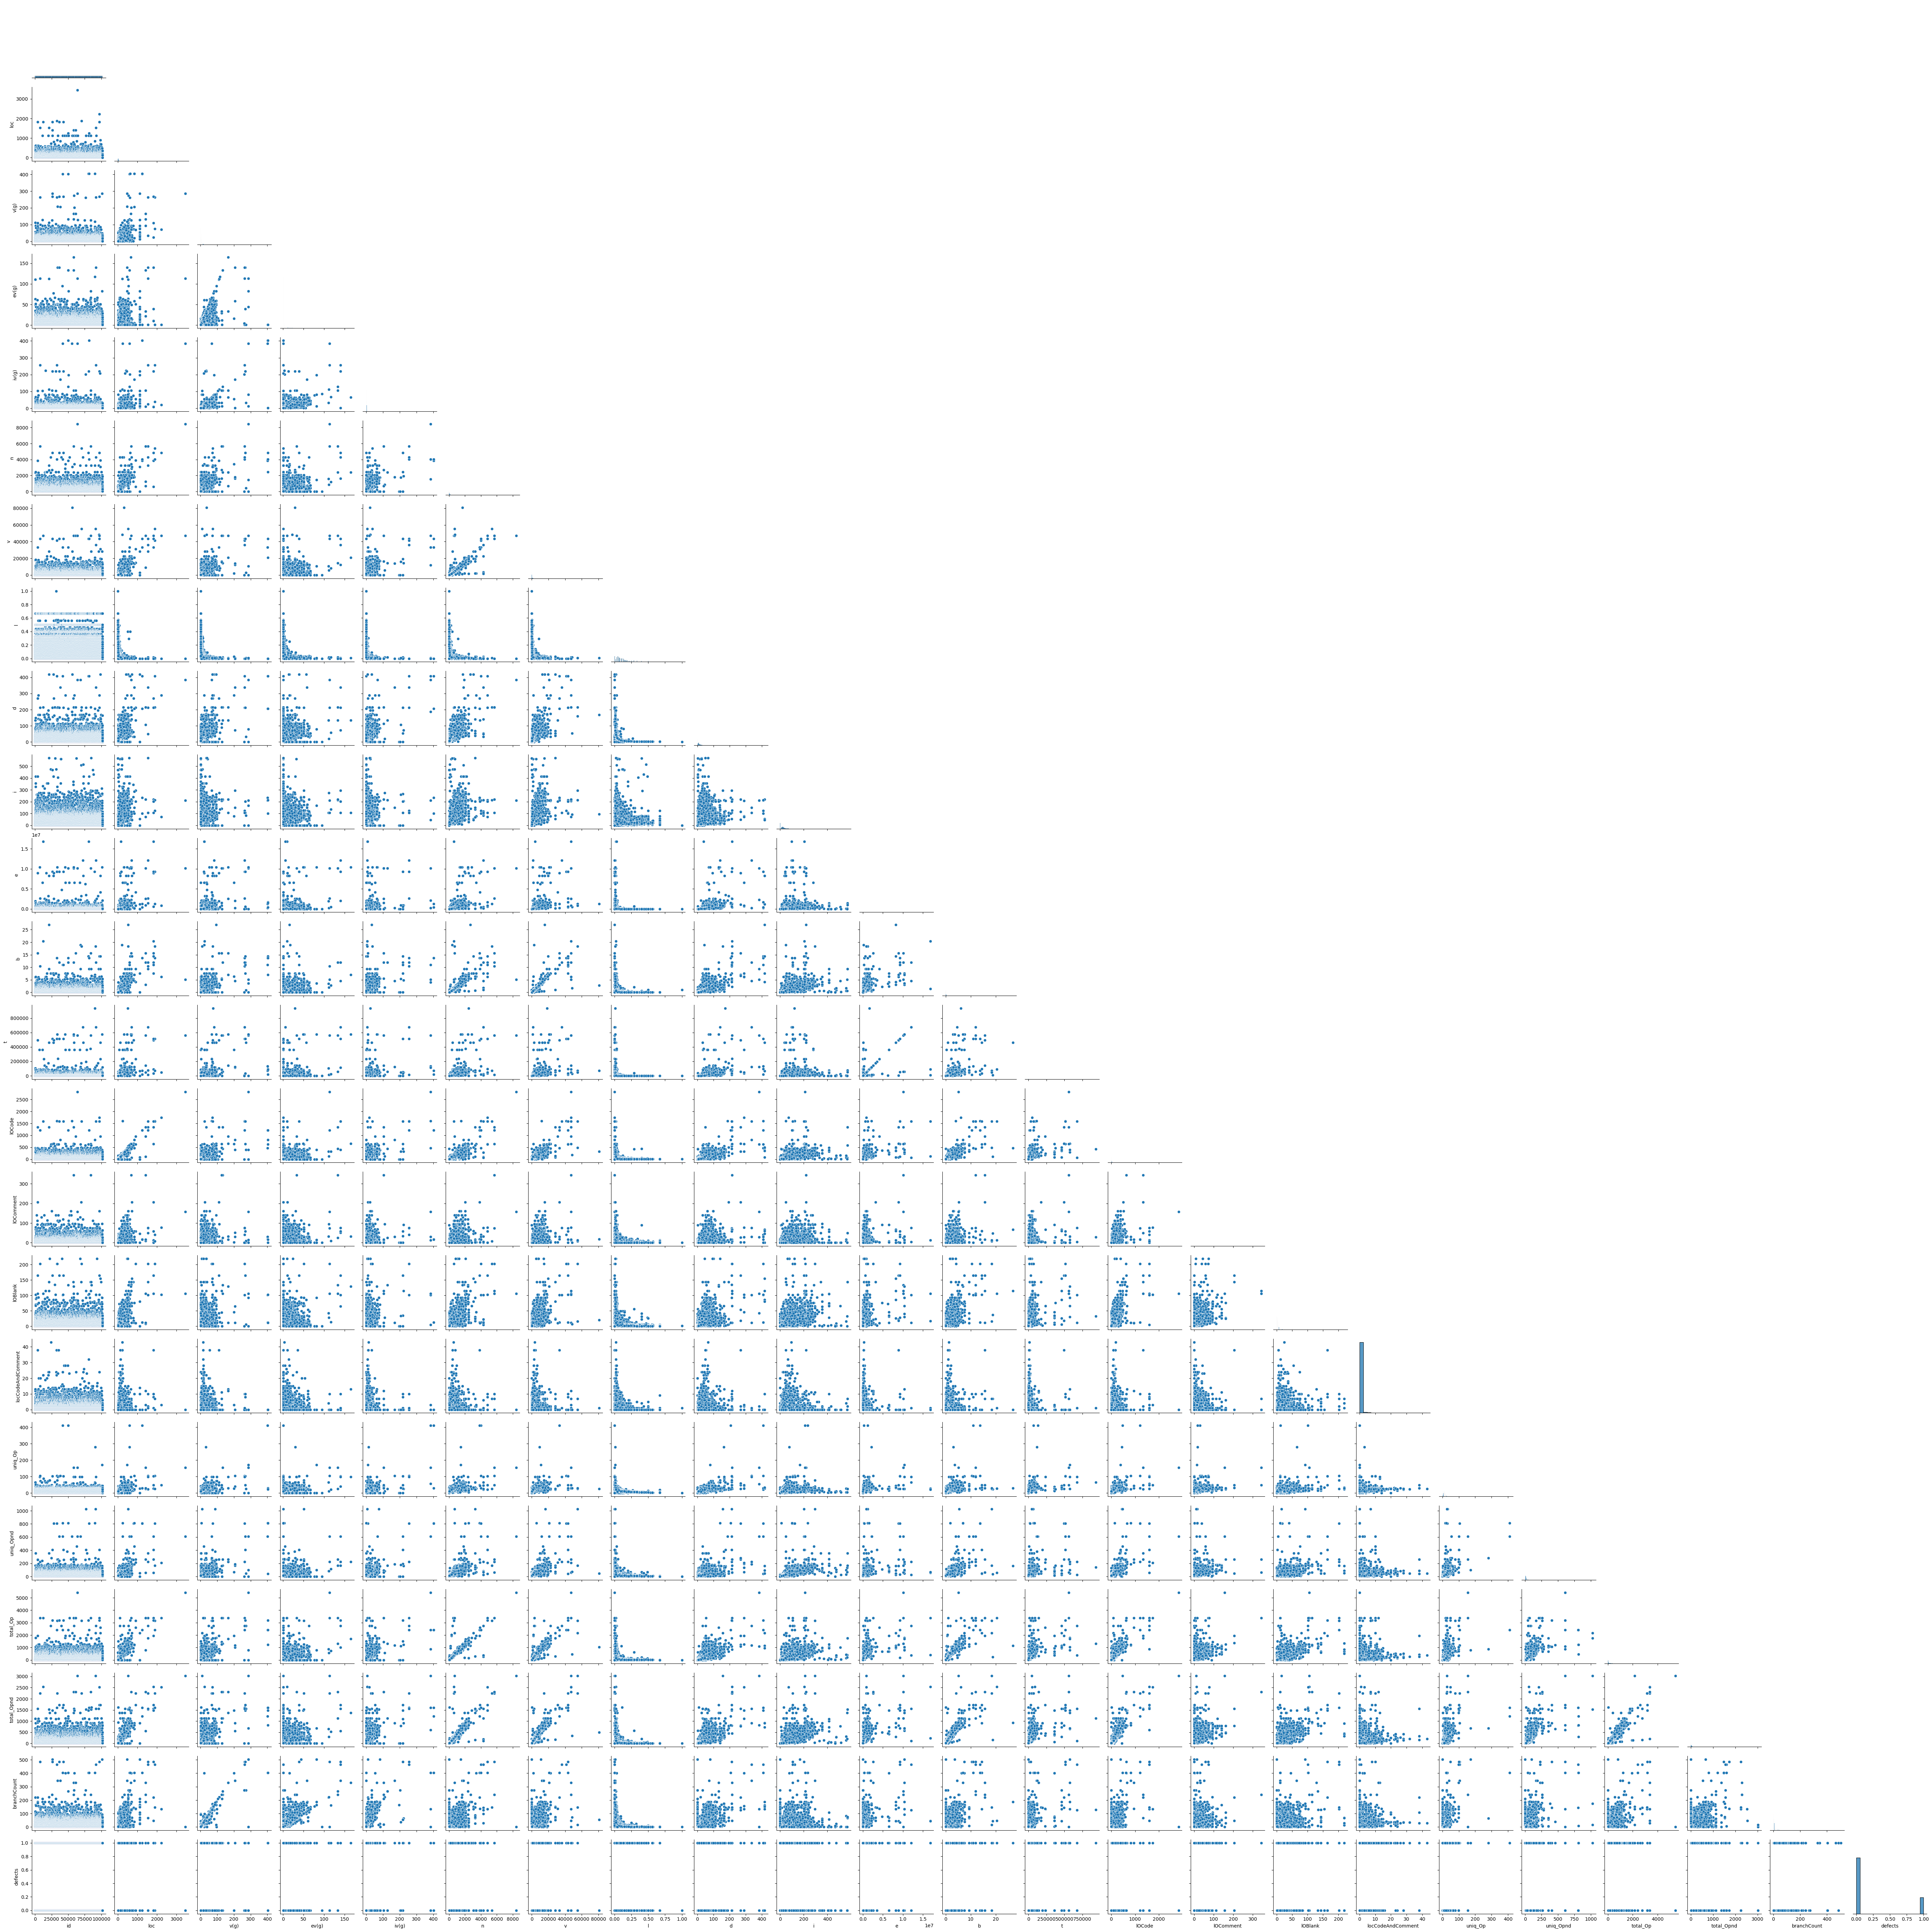

In [7]:
# PairPlot
plt.figure(figsize=(12,12))
sns.pairplot(data,
            corner=True)
plt.show()

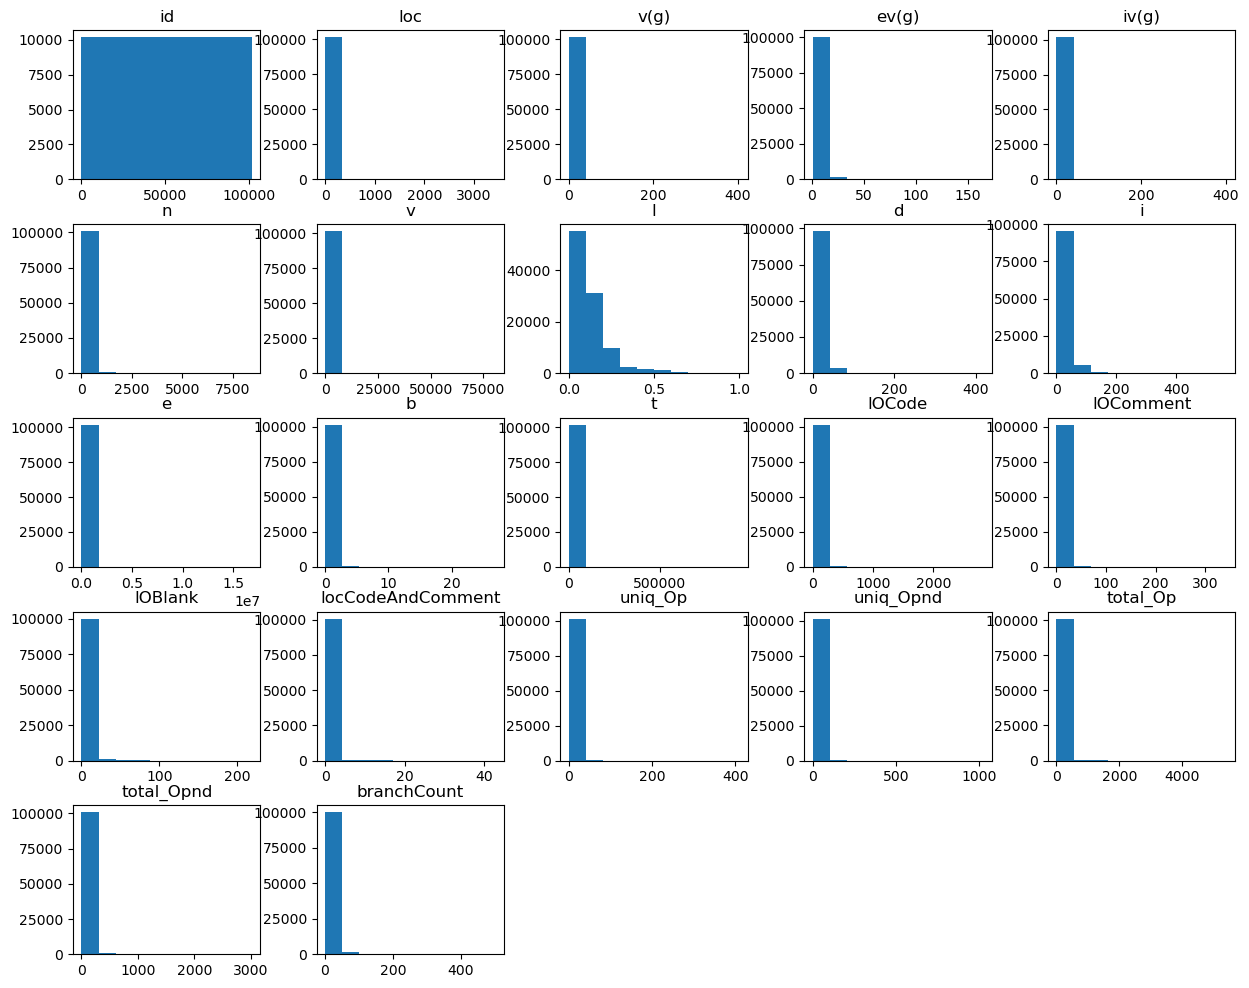

In [8]:
# Histogram
data.hist(figsize=(15,12),
          grid=False)
plt.show()

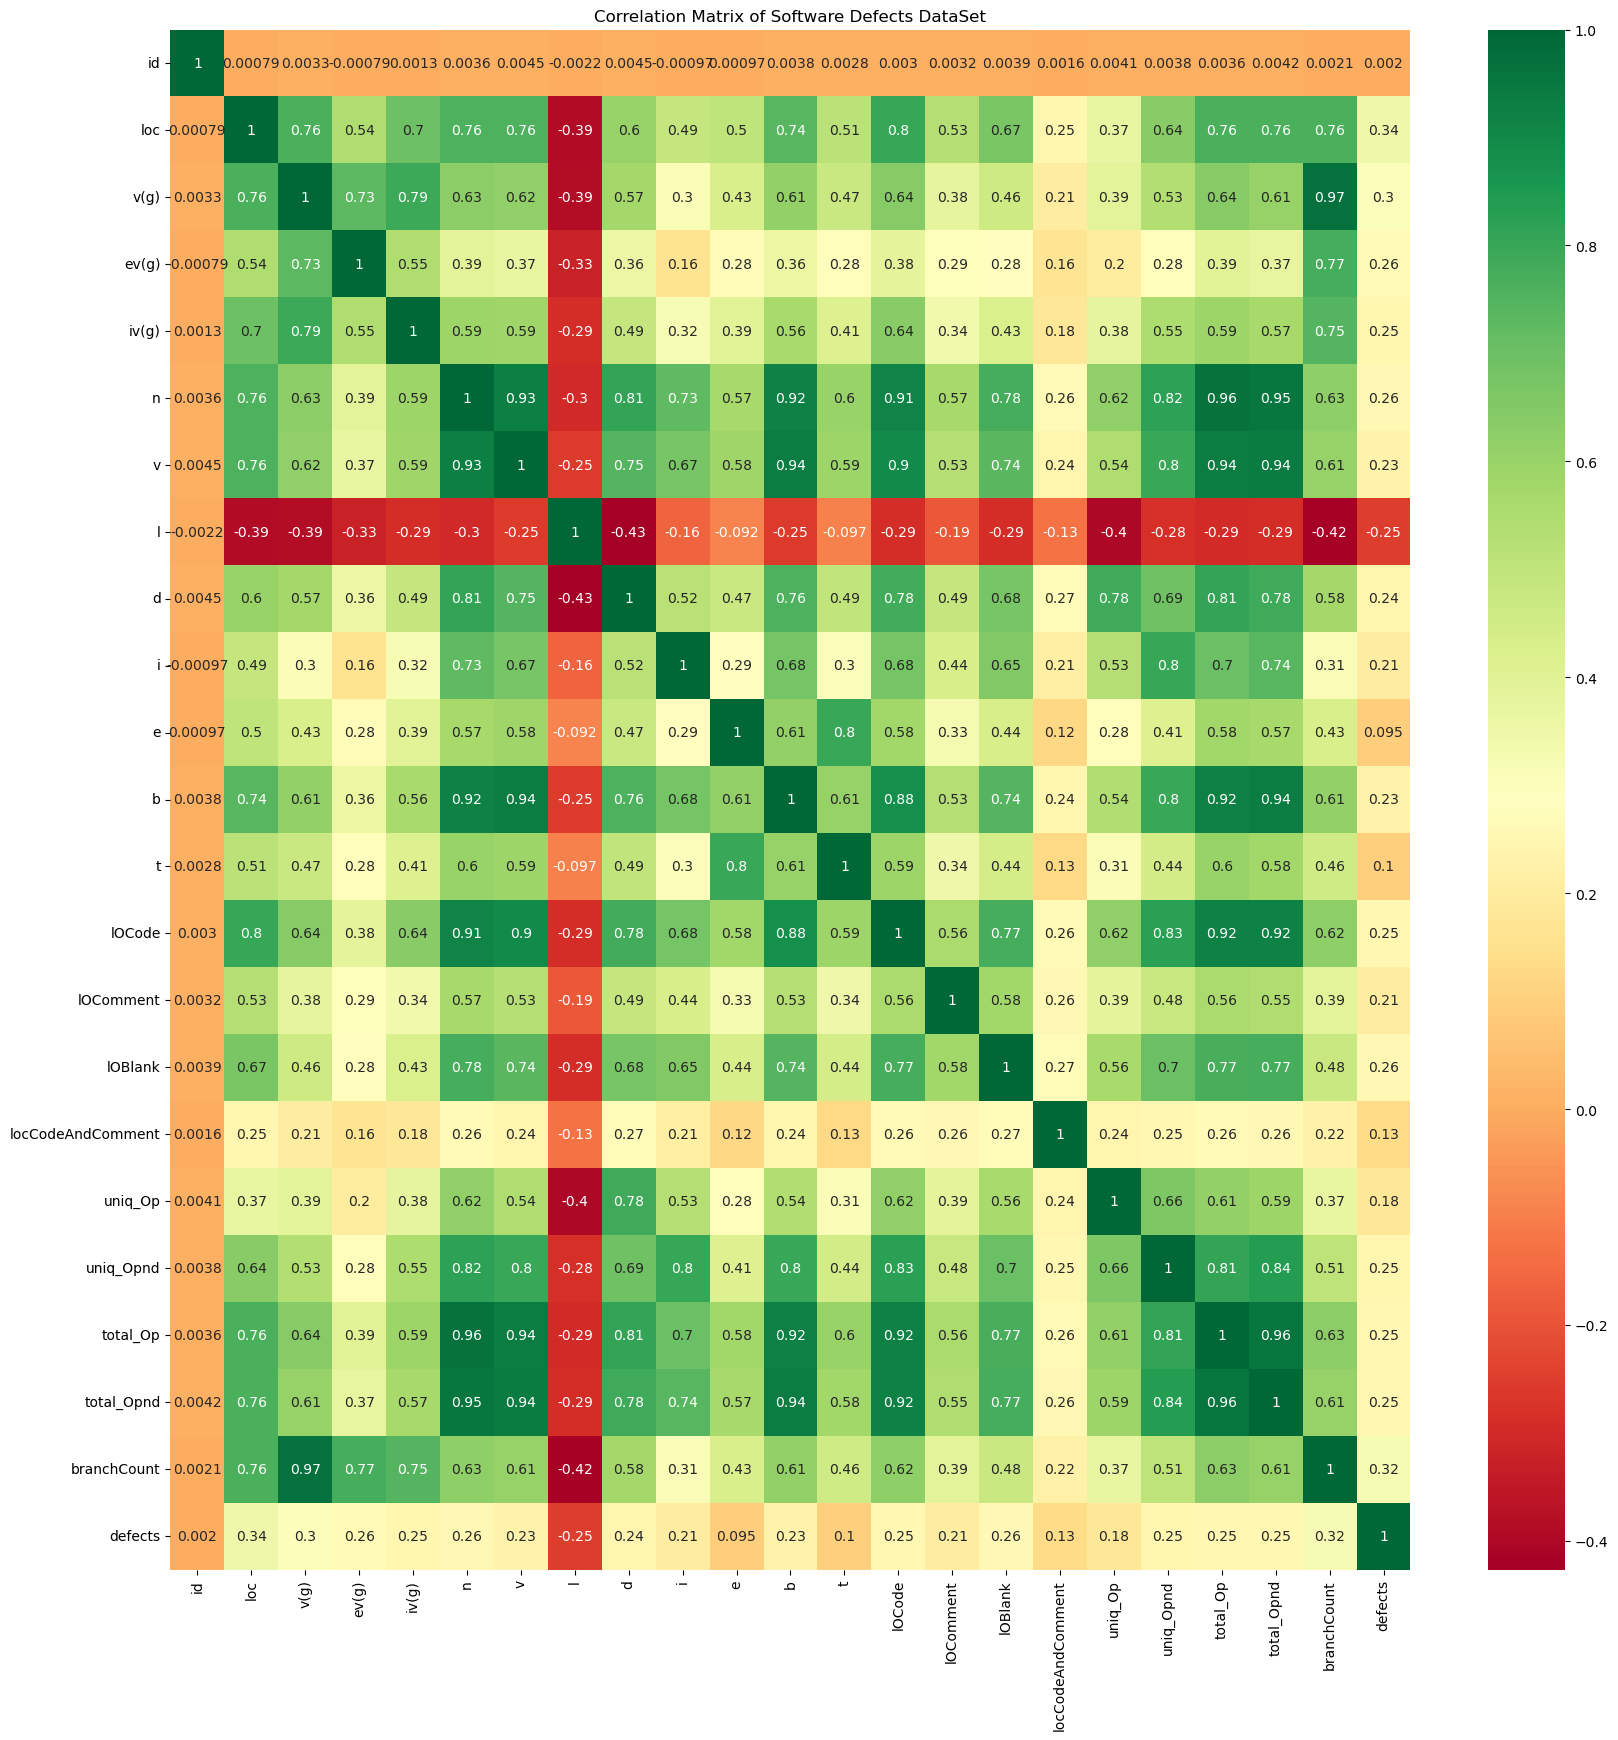

In [9]:
# Corr
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),
            annot=True,
            cmap='RdYlGn')
plt.title("Correlation Matrix of Software Defects DataSet")
plt.show()

In [10]:
# We import label encoder for converting our bool col type to int 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['defects'] = le.fit_transform(data['defects'])
data.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0


In [11]:
# We drop the ID Column
data_new = data.drop(columns=['id'])
data_new

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,0
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,0
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,0
101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,1534.04,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,0


In [12]:
# Scaling our Data.
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
train = ms.fit_transform(data_new)
train = pd.DataFrame(train,columns=data_new.columns)
train

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0.006103,0.004963,0.000000,0.002494,0.007108,0.003447,0.06,0.046772,0.025010,0.000323,...,0.006020,0.002907,0.004566,0.0,0.039024,0.008772,0.007011,0.007282,0.007968,0.0
1,0.003778,0.002481,0.000000,0.002494,0.003791,0.001871,0.14,0.016738,0.037049,0.000056,...,0.003895,0.000000,0.004566,0.0,0.026829,0.010721,0.003321,0.004634,0.003984,0.0
2,0.002906,0.002481,0.000000,0.002494,0.005331,0.002445,0.11,0.019249,0.039945,0.000104,...,0.002833,0.000000,0.004566,0.0,0.029268,0.010721,0.005166,0.005627,0.003984,0.0
3,0.002034,0.000000,0.000000,0.000000,0.002725,0.001163,0.19,0.012554,0.031345,0.000028,...,0.001416,0.000000,0.009132,0.0,0.019512,0.005848,0.002952,0.002317,0.000000,1.0
4,0.002906,0.002481,0.000000,0.002494,0.002014,0.000754,0.18,0.013462,0.021833,0.000022,...,0.002479,0.000000,0.009132,0.0,0.017073,0.005848,0.001845,0.003310,0.003984,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,0.002616,0.002481,0.000000,0.000000,0.003317,0.001521,0.15,0.015782,0.032697,0.000048,...,0.002479,0.000000,0.004566,0.0,0.026829,0.007797,0.002952,0.003972,0.003984,0.0
101759,0.007556,0.009926,0.018293,0.000000,0.012676,0.006926,0.06,0.043042,0.059971,0.000669,...,0.008144,0.000000,0.009132,0.0,0.043902,0.019493,0.012362,0.013241,0.015936,0.0
101760,0.007265,0.000000,0.000000,0.000000,0.009833,0.004455,0.04,0.054400,0.022044,0.000350,...,0.007082,0.000000,0.018265,0.0,0.024390,0.007797,0.009410,0.009268,0.000000,0.0
101761,0.002616,0.002481,0.000000,0.002494,0.005094,0.002372,0.15,0.015447,0.051827,0.000091,...,0.002479,0.000000,0.004566,0.0,0.026829,0.013645,0.004428,0.006289,0.003984,0.0


In [13]:
# Define X and Y Variable
Y = data_new[['defects']]
X = data_new.drop(columns=['defects'])

# Splitting the data into X and Y Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42)
# len of our splitted data
len(X_train),len(X_test),len(Y_train),len(Y_test)

(81410, 20353, 81410, 20353)

In [14]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
model = dtree.fit(X_train, Y_train)
model

# Prediction
Y_test['Pred_Dtree'] = model.predict(X_test)

In [15]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state= 42,
                             n_estimators= 2000,
                             criterion='log_loss',
                             n_jobs=-1)
mdl = rfc.fit(X_train, Y_train)
mdl

# Prediction
Y_test['Pred_RFC'] = mdl.predict(X_test)

In [16]:
# SVM (Support Vector Machine)
from sklearn.svm import SVC
svm = SVC(random_state=42)
model2 = svm.fit(X_train,Y_train)
model2
Y_test["Predicted_SVM"] = model2.predict(X_test)

In [17]:
# ExtraTree Classifiers
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=1000,
                           n_jobs=-1,
                           random_state=42)

model_etc = etc.fit(X_train,
                    Y_train)
model_etc

# Prediction
Y_test['Pred_ExtraTree'] = model_etc.predict(X_test)

In [18]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=1000, 
                         random_state=42)

model_abc = abc.fit(X_train,
                    Y_train)
model_abc

# Prediction
Y_test['Pred_AdaB'] = model_abc.predict(X_test)

In [19]:
# GradiantBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=1000, 
                                 random_state=42)

model_gbc = gbc.fit(X_train,
                    Y_train)
model_gbc

# Prediction
Y_test['Pred_GBC'] = model_gbc.predict(X_test)

In [20]:
# XGBoost Classifier
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(n_estimators=1000, 
                                   random_state=42)

model_xgb = xgb_classifier.fit(X_train, 
                               Y_train)

# Prediction
Y_test['Pred_xgb'] = model_xgb.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
# DeTree
print("Decision Tree")
print(classification_report(Y_test['defects'], Y_test['Pred_Dtree']))
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")


# for random forest
print("Random Forest")
print(classification_report(Y_test["defects"],Y_test["Pred_RFC"]))
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")


# SVm
print("Support Vector Machine")
print(classification_report(Y_test["defects"],Y_test["Predicted_SVM"]))
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")


# ExtraTree
print("ExtraTree Classifiers")
print(classification_report(Y_test["defects"],Y_test["Pred_ExtraTree"]))
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")


# AdaBoost
print('AdaBoost')
print(classification_report(Y_test['defects'],Y_test['Pred_AdaB']))
print('--------------------------------------------------------------------')
print("--------------------------------------------------------------------")


# GradiantBoost
print("GradiantBoost Classifiers")
print(classification_report(Y_test["defects"],Y_test["Pred_GBC"]))
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")


# XGBoost
print("XGBoost Classifiers")
print(classification_report(Y_test["defects"],Y_test["Pred_xgb"]))
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")

Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.80      0.82     15825
           1       0.38      0.41      0.39      4528

    accuracy                           0.72     20353
   macro avg       0.60      0.61      0.60     20353
weighted avg       0.73      0.72      0.72     20353

--------------------------------------------------------------------
--------------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     15825
           1       0.62      0.38      0.47      4528

    accuracy                           0.81     20353
   macro avg       0.73      0.66      0.68     20353
weighted avg       0.79      0.81      0.79     20353

--------------------------------------------------------------------
--------------------------------------------------------------------
Support Vector Machine
              preci

After Running Few Machine Learning Algorithms, We Conclued
Based on the F1-scores and considering accuracy, the best-performing models seem to be Random Forest, ExtraTree Classifiers, AdaBoost, and Gradient Boost Classifiers, all of which have an accuracy around 0.81. Among these, Gradient Boost Classifiers have slightly better F1-scores, which indicates a better balance between precision and recall for both classes. Therefore, Gradient Boost Classifiers could be considered the best-performing model based on the provided evaluation metrics.

In [27]:
from sklearn.metrics import roc_auc_score

# Calculate AUC for Decision Tree
auc_dtree = roc_auc_score(Y_test['defects'], Y_test['Pred_Dtree'])
print(f"AUC for Decision Tree: {auc_dtree}")

# Calculate AUC for Random Forest
auc_rfc = roc_auc_score(Y_test["defects"], Y_test["Pred_RFC"])
print(f"AUC for Random Forest: {auc_rfc}")

# Calculate AUC for SVM
auc_svm = roc_auc_score(Y_test["defects"], Y_test["Predicted_SVM"])
print(f"AUC for Support Vector Machine: {auc_svm}")

# Calculate AUC for ExtraTree Classifiers
auc_extra_tree = roc_auc_score(Y_test["defects"], Y_test["Pred_ExtraTree"])
print(f"AUC for ExtraTree Classifiers: {auc_extra_tree}")

# Calculate AUC for AdaBoost
auc_adaboost = roc_auc_score(Y_test['defects'], Y_test['Pred_AdaB'])
print(f"AUC for AdaBoost: {auc_adaboost}")

# Calculate AUC for GradientBoost
auc_gradient_boost = roc_auc_score(Y_test["defects"], Y_test["Pred_GBC"])
print(f"AUC for GradientBoost Classifiers: {auc_gradient_boost}")

# Calculate AUC for XGBoost
auc_xgb = roc_auc_score(Y_test["defects"], Y_test["Pred_xgb"])
print(f"AUC for XGBoost Classifiers: {auc_xgb}")


AUC for Decision Tree: 0.6086251528142951
AUC for Random Forest: 0.6564699339618955
AUC for Support Vector Machine: 0.5558438349549791
AUC for ExtraTree Classifiers: 0.6539751673281642
AUC for AdaBoost: 0.6573252613892006
AUC for GradientBoost Classifiers: 0.6599735121888589
AUC for XGBoost Classifiers: 0.6599297193799228


**** After Seeing the AUC Curve, We Can Clearly See that the AUC =< 0.65 Models performed well, but I am considering the AUC score and classification report. ****

**** After seeing both the parameters, I am considering the Gradient Boost as the best model.****